In [2]:
import pandas as pd
from scipy import stats
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
def make_var_df(input_csv):
    tpm_df = pd.read_csv(input_csv, index_col=0)
    coef_var = np.log10((tpm_df.std(axis=1)/tpm_df.mean(axis=1))**2)
    means = np.log10(tpm_df.mean(axis=1))
    result = stats.linregress(means, coef_var)
    slope = result[0]
    y_int = result[1]
    var_df = pd.DataFrame([coef_var, means]).T
    var_df.rename(columns = {0:'coef_var',1:'mean'}, inplace=True)
    var_df['expected'] = var_df['mean']*slope + y_int
    
    return var_df

In [4]:
tpm_input_file = "/home/ucsd-train13/scratch/projects/rnaSeqAnalysis/tpm.csv"
#specify input file
save_dir = "/home/ucsd-train13/scratch/projects/rnaSeqAnalysis/"
#specify save directory

In [5]:
tpm = pd.read_csv(tpm_input_file, index_col=0)
#load matrix
print(tpm.shape)
tpm.head()

(13503, 2065)


,2,3,4,5,6,7,8,9,10,11,...,2057,2058,2059,2060,2061,2062,2063,2064,2065,2066
0,,,,,,,,,,,,,,,,,,,,,
ENSG00000118965.14,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,2.864509,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
ENSG00000068079.7,0.199346,0.000000,0.000000,0.332602,0.683644,0.000000,0.347198,0.000000,0.000000,0.000000,...,0.0,0.000000,2.859594,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
ENSG00000120509.10,1.594769,1.791687,1.886259,0.665203,2.734575,2.067896,4.166377,1.121286,1.897389,1.186005,...,0.0,0.000000,5.719188,0.0,0.0,2.872738,0.0,0.0,11.524056,0.0
ENSG00000230614.3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
ENSG00000166484.19,0.000000,0.298614,0.000000,0.000000,0.000000,0.344649,0.000000,0.373762,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0


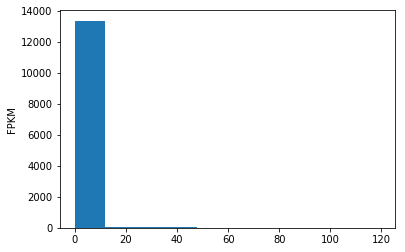

In [6]:
#show expample of 1 cell
plt.hist(tpm['2'])
plt.ylabel("FPKM")
plt.show()

In [7]:
###Define highly variable genes for downstream analyses
#first calculate stdevs of all genes across cells
sd = tpm.std(axis=1)
sd.head()

0
ENSG00000118965.14    0.386870
ENSG00000068079.7     0.695477
ENSG00000120509.10    1.732233
ENSG00000230614.3     0.187473
ENSG00000166484.19    0.441267
dtype: float64

In [8]:
#calculate mean across genes
mean_expr = tpm.mean(axis=1)
mean_expr.head()

0
ENSG00000118965.14    0.082480
ENSG00000068079.7     0.269128
ENSG00000120509.10    1.598091
ENSG00000230614.3     0.022248
ENSG00000166484.19    0.108455
dtype: float64

In [9]:
#to calculate coefficient variation
coef_var = np.log10((sd/mean_expr)**2)
#####note: findsimilargenes in SEURAT does something similar
coef_var.head()

0
ENSG00000118965.14    1.342433
ENSG00000068079.7     0.824649
ENSG00000120509.10    0.070010
ENSG00000230614.3     1.851276
ENSG00000166484.19    1.218908
dtype: float64

In [10]:
#calculate means of expression for all genes
means = np.log10(mean_expr)
means.head()

0
ENSG00000118965.14   -1.083651
ENSG00000068079.7    -0.570042
ENSG00000120509.10    0.203602
ENSG00000230614.3    -1.652700
ENSG00000166484.19   -0.964752
dtype: float64

In [11]:
reg_result = stats.linregress(means, coef_var)
reg_result

LinregressResult(slope=-0.959464180359913, intercept=0.29515746487660044, rvalue=-0.9967164548551524, pvalue=0.0, stderr=0.0006708166963083404)

In [12]:
slope = reg_result[0]
yint = reg_result[1]

In [13]:
var_df = pd.DataFrame([coef_var, means]).T
var_df.rename(columns = {0:"coef_var", 1:"mean"}, inplace=True)
var_df.head()

,coef_var,mean
0,,
ENSG00000118965.14,1.342433,-1.083651
ENSG00000068079.7,0.824649,-0.570042
ENSG00000120509.10,0.070010,0.203602
ENSG00000230614.3,1.851276,-1.652700
ENSG00000166484.19,1.218908,-0.964752


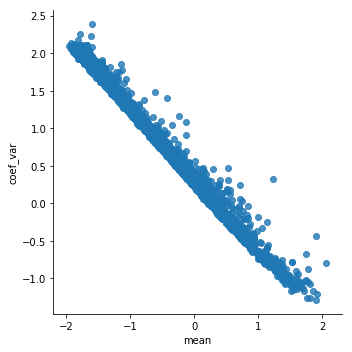

In [14]:
sns.lmplot('mean', 'coef_var', var_df, fit_reg=False)

In [15]:
var_df['expected'] = var_df['mean']*slope + yint
var_df.head()

,coef_var,mean,expected
0,,,
ENSG00000118965.14,1.342433,-1.083651,1.334882
ENSG00000068079.7,0.824649,-0.570042,0.842092
ENSG00000120509.10,0.070010,0.203602,0.099809
ENSG00000230614.3,1.851276,-1.652700,1.880864
ENSG00000166484.19,1.218908,-0.964752,1.220803


In [16]:
var_df = make_var_df(tpm_input_file)
var_df.head()

,coef_var,mean,expected
0,,,
ENSG00000118965.14,1.342433,-1.083651,1.334882
ENSG00000068079.7,0.824649,-0.570042,0.842092
ENSG00000120509.10,0.070010,0.203602,0.099809
ENSG00000230614.3,1.851276,-1.652700,1.880864
ENSG00000166484.19,1.218908,-0.964752,1.220803


In [17]:
#define significant genes and add this as column
var_df['sig'] = (var_df['coef_var'] - var_df['expected']) > 0.05
var_df.head()

,coef_var,mean,expected,sig
0,,,,
ENSG00000118965.14,1.342433,-1.083651,1.334882,False
ENSG00000068079.7,0.824649,-0.570042,0.842092,False
ENSG00000120509.10,0.070010,0.203602,0.099809,False
ENSG00000230614.3,1.851276,-1.652700,1.880864,False
ENSG00000166484.19,1.218908,-0.964752,1.220803,False


In [18]:
var_df['sig'].sum()

1211

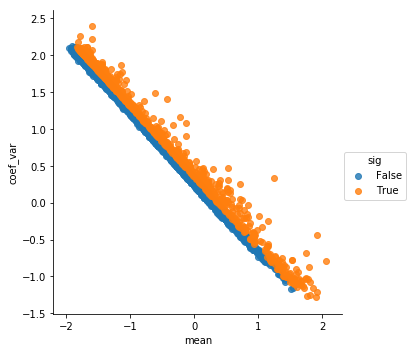

In [19]:
sns.lmplot('mean', 'coef_var', var_df, hue='sig', fit_reg=False)
#plt.savefig("/path/to/save/pict/.tif")

In [20]:
#subset dataframe to keep only variable genes
tpm_var_genes = tpm.loc[var_df['sig']]
print(tpm_var_genes.shape)
tpm_var_genes.head()

(1211, 2065)


,2,3,4,5,6,7,8,9,10,11,...,2057,2058,2059,2060,2061,2062,2063,2064,2065,2066
0,,,,,,,,,,,,,,,,,,,,,
ENSG00000130827.6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
ENSG00000187123.14,0.000000,0.000000,0.000000,0.332602,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
ENSG00000272398.5,0.598038,0.895843,0.314376,0.000000,2.392753,1.378597,1.041594,0.373762,0.379478,0.395335,...,0.00000,0.000000,0.0,0.0,0.0,2.872738,0.0,0.0,0.000000,0.0
ENSG00000134852.14,0.398692,0.000000,0.314376,0.332602,0.000000,0.000000,0.000000,0.000000,1.138434,0.395335,...,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
ENSG00000119986.6,0.199346,0.000000,0.943129,0.000000,0.000000,0.344649,0.000000,0.373762,0.000000,0.000000,...,2.86533,2.864509,0.0,0.0,0.0,0.000000,0.0,0.0,2.881014,0.0


In [21]:
tpm_var_genes.to_csv(save_dir+"tpm_all_vg_0.02.csv")